In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#'speech_commands' in tfds.list_builders()

True

In [3]:
ds = tfds.load('spoken_digit', split='train', as_supervised=True)

[<tf.Tensor: shape=(1525,), dtype=int64, numpy=array([   0,    0, -256, ..., -512, -256, -512], dtype=int64)>, <tf.Tensor: shape=(), dtype=int64, numpy=2>]
tf.Tensor([   0    0 -256 ... -512 -256 -512], shape=(1525,), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


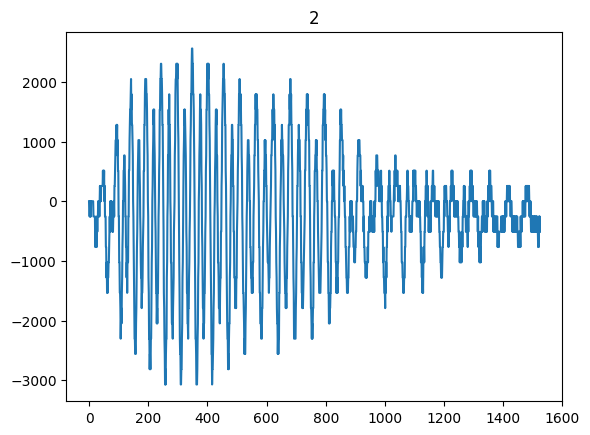

In [4]:
ex = ds.take(1)
for example in ex:
    print(list(example))
    print(example[0])
    print(example[1])
    plt.plot(example[0])
    plt.title(tf.keras.backend.get_value(example[1]))

In [5]:
# NEED TO PAD THE DATA

ds = ds.shuffle(2500, seed = 42)
ds_train = ds.skip(500)
ds_test = ds.take(500)

max_length = max(len(sample[0]) for sample in ds)
print(max_length)

# OK there is one audio file that is way longer than the rest so we need to handle that for padding
# look into np.pad

ds_train_audio = list(ds_train.map(lambda x, y: x).as_numpy_iterator())
ds_train_label = list(ds_train.map(lambda x, y: y).as_numpy_iterator())

ds_test_audio = list(ds_test.map(lambda x, y: x).as_numpy_iterator())
ds_test_label = list(ds_test.map(lambda x, y: y).as_numpy_iterator())

18262


In [41]:
# For now remove the audio samples that are too long
ds_train_label = [ds_train_label[i] for i, x in enumerate(ds_train_audio) if len(x) < 5000]
ds_train_audio = [x for x in ds_train_audio if len(x) < 5000]

#print(sum(len(sample) > 5000 for sample in ds_train_audio))
print("Size of sample:", len(ds_train_label))

0
Size of sample: 1904


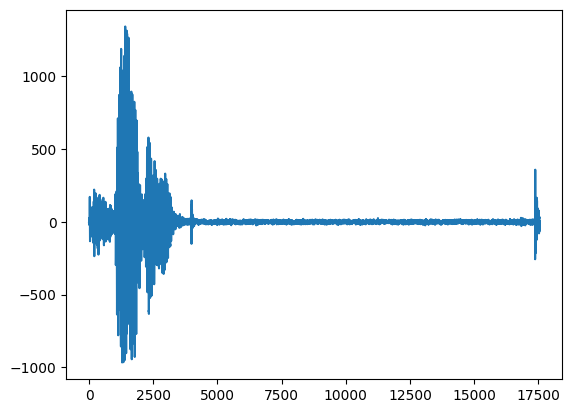

4

In [32]:
# max_index = np.argmax(list(len(sample) for sample in ds_train_audio))
# plt.plot(ds_train_audio[max_index])
# plt.show()
# ds_train_audio.pop(max_index)
# ds_train_label.pop(max_index)

# max_index = np.argmax(list(len(sample) for sample in ds_train_audio))
# plt.plot(ds_train_audio[max_index])
# plt.show()
# ds_train_audio.pop(max_index)
# ds_train_label.pop(max_index)


In [11]:
#NEED TO PAD THE AUDIO I BELIEVE
# WILL FIGURE IT OUT

model = models.Sequential()
model.add(layers.Conv1D(3, 3, activation = "relu", padding="same"))
model.add(layers.MaxPooling1D(2))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(ds_train_audio, ds_train_label, epochs=5, 
                    validation_data=(ds_test_audio, ds_test_label))

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'numpy.int64'>"})

In [16]:
for x in ds_train_audio:
   print(len(x))

4348
5318
3737
2683
3188
4101
2328
2300
2720
3888
3142
2034
2918
2900
4835
3813
2590
2246
1852
3118
3539
2036
1837
2589
2983
4105
4282
2968
4087
1795
3050
3756
3842
2860
2843
4023
2982
4243
2765
1560
3167
2023
2545
2261
3160
1720
2329
3422
3187
3513
2681
2857
2550
4442
4252
4254
1541
3380
3508
3357
3062
2230
2876
3877
2829
3078
3087
3402
3232
2888
3693
4917
2865
3635
4984
2707
2869
2885
3126
3643
4343
1945
4108
2499
2711
3401
5696
4169
3303
4968
2985
3180
4413
2648
2171
3601
2990
2668
3746
2979
2696
3465
3921
4014
3518
2837
3118
4341
2912
1772
4308
1973
2302
2886
3578
1832
4393
3041
2635
2524
2042
2904
2005
3091
3599
3786
2385
2770
3699
4330
1302
4488
3768
3902
2174
3347
5738
4257
4013
4242
2707
3939
6883
3940
2483
2474
3581
2847
2507
4737
3491
3241
3435
2431
1903
2382
4622
3299
2257
1399
4213
3554
2818
3843
2235
2529
5167
3112
2365
2155
3829
3626
2342
2760
2333
3485
3861
3307
3805
4296
3372
2045
3248
2311
2565
2411
2895
2110
3582
3158
4290
3759
4108
5239
2618
2454
4591
3306
4677
2793
